In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9fbca129403fbfaa24a6b69459fdda6a


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [7]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=9fbca129403fbfaa24a6b69459fdda6a&q=Boston


In [8]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [9]:
city_weather.status_code

200

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04d"}],"base":"stations","main":{"temp":54.23,"feels_like":52.45,"temp_min":51.8,"temp_max":57,"pressure":1016,"humidity":66},"visibility":10000,"wind":{"speed":12.66,"deg":90},"clouds":{"all":90},"dt":1617826475,"sys":{"type":1,"id":3486,"country":"US","sunrise":1617790552,"sunset":1617837376},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 54.23,
  'feels_like': 52.45,
  'temp_min': 51.8,
  'temp_max': 57,
  'pressure': 1016,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 90},
 'clouds': {'all': 90},
 'dt': 1617826475,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1617790552,
  'sunset': 1617837376},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 54.23,
  'feels_like': 52.45,
  'temp_min': 51.8,
  'temp_max': 57,
  'pressure': 1016,
  'humidity': 66},
 'visibility': 10000,
 'wind': {'speed': 12.66, 'deg': 90},
 'clouds': {'all': 90},
 'dt': 1617826475,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1617790552,
  'sunset': 1617837376},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# get the JSON data.
boston_data = city_weather.json()

In [18]:
boston_data['sys']['country']

'US'

In [19]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 57 66 90 12.66


In [20]:
boston_data['dt']

1617826475

In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-04-07 20:14:35'

In [22]:
# Create an empty list to hold the weather data. 
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval        ")
print("--------------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval        
--------------------------------
Processing Record 1 of Set 1 | crystal beach
Processing Record 2 of Set 1 | parainen
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | les cayes
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | atasu
Processing Record 10 of Set 1 | pochutla
Processing Record 11 of Set 1 | la rioja
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | codrington
Processing Record 15 of Set 1 | hithadhoo
Processing Record 16 of Set 1 | saint-die
City not found. Skipping...
Processing Record 17 of Set 1 | saryozek
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | chuy
Processing Record 22 of Set 1 | s

Processing Record 34 of Set 4 | dibrugarh
Processing Record 35 of Set 4 | memaliaj
Processing Record 36 of Set 4 | uarini
Processing Record 37 of Set 4 | vanderhoof
Processing Record 38 of Set 4 | mount isa
Processing Record 39 of Set 4 | geraldton
Processing Record 40 of Set 4 | alotau
City not found. Skipping...
Processing Record 41 of Set 4 | tateyama
Processing Record 42 of Set 4 | souillac
Processing Record 43 of Set 4 | marcona
City not found. Skipping...
Processing Record 44 of Set 4 | asau
Processing Record 45 of Set 4 | beruwala
Processing Record 46 of Set 4 | ous
Processing Record 47 of Set 4 | crab hill
City not found. Skipping...
Processing Record 48 of Set 4 | tacuarembo
Processing Record 49 of Set 4 | upata
Processing Record 50 of Set 4 | bambous virieux
Processing Record 1 of Set 5 | omboue
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | xingyi
Processing Record 4 of Set 5 | ikalamavony
Processing Record 5 of Set 5 | ambilobe
Processing Record 6 of

Processing Record 25 of Set 8 | winslow
Processing Record 26 of Set 8 | walvis bay
Processing Record 27 of Set 8 | yar-sale
Processing Record 28 of Set 8 | iqaluit
Processing Record 29 of Set 8 | maetaguse
City not found. Skipping...
Processing Record 30 of Set 8 | port augusta
Processing Record 31 of Set 8 | anloga
Processing Record 32 of Set 8 | margate
Processing Record 33 of Set 8 | luau
Processing Record 34 of Set 8 | torres
Processing Record 35 of Set 8 | le port
Processing Record 36 of Set 8 | manokwari
Processing Record 37 of Set 8 | byron bay
Processing Record 38 of Set 8 | kangaatsiaq
Processing Record 39 of Set 8 | rio das ostras
Processing Record 40 of Set 8 | andilamena
Processing Record 41 of Set 8 | kathu
Processing Record 42 of Set 8 | camopi
Processing Record 43 of Set 8 | baoding
Processing Record 44 of Set 8 | qandala
Processing Record 45 of Set 8 | cintalapa
Processing Record 46 of Set 8 | college
Processing Record 47 of Set 8 | samusu
City not found. Skipping...
Pr

Processing Record 16 of Set 12 | montrose
Processing Record 17 of Set 12 | usolye
Processing Record 18 of Set 12 | lewistown
Processing Record 19 of Set 12 | komsomolskiy
Processing Record 20 of Set 12 | arman
Processing Record 21 of Set 12 | alofi
Processing Record 22 of Set 12 | sonoita
Processing Record 23 of Set 12 | porto santo
Processing Record 24 of Set 12 | teguise
Processing Record 25 of Set 12 | yumen
Processing Record 26 of Set 12 | syracuse
Processing Record 27 of Set 12 | kaeo
Processing Record 28 of Set 12 | jijiang
Processing Record 29 of Set 12 | leningradskiy
Processing Record 30 of Set 12 | mullaitivu
City not found. Skipping...
Processing Record 31 of Set 12 | ponta delgada
Processing Record 32 of Set 12 | los zacatones
Processing Record 33 of Set 12 | aswan
Processing Record 34 of Set 12 | srandakan
Processing Record 35 of Set 12 | gat
Processing Record 36 of Set 12 | altay
Processing Record 37 of Set 12 | doctor pedro p. pena
City not found. Skipping...
Processing 

In [23]:
# Tally the number of cities
print(len(city_data))

571


In [37]:
# Convert the array of dictionaries to a pandas dataframe.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(14)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Crystal Beach,42.8699,-79.0583,72.00,54,98,10.36,CA,2021-04-07 20:16:11
1,Parainen,60.3067,22.3010,33.01,93,75,2.30,FI,2021-04-07 20:16:11
2,Ushuaia,-54.8000,-68.3000,50.00,87,75,1.81,AR,2021-04-07 20:11:32
3,Les Cayes,18.2000,-73.7500,80.58,72,100,2.59,HT,2021-04-07 20:16:11
4,Mataura,-46.1927,168.8643,45.00,96,59,2.71,NZ,2021-04-07 20:12:22
5,Jamestown,42.0970,-79.2353,75.00,46,1,5.75,US,2021-04-07 20:12:31
6,Bluff,-46.6000,168.3333,45.00,96,39,12.62,NZ,2021-04-07 20:12:22
7,Atasu,48.6814,71.6433,40.06,79,1,7.16,KZ,2021-04-07 20:16:12
8,Pochutla,15.7432,-96.4661,95.00,38,20,17.27,MX,2021-04-07 20:13:16
9,La Rioja,42.2500,-2.5000,46.40,53,0,1.14,ES,2021-04-07 20:16:12


In [25]:
# Reorder the columns of the dataframe
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Crystal Beach,CA,2021-04-07 20:16:11,42.8699,-79.0583,72.00,54,98,10.36
1,Parainen,FI,2021-04-07 20:16:11,60.3067,22.3010,33.01,93,75,2.30
2,Ushuaia,AR,2021-04-07 20:11:32,-54.8000,-68.3000,50.00,87,75,1.81
3,Les Cayes,HT,2021-04-07 20:16:11,18.2000,-73.7500,80.58,72,100,2.59
4,Mataura,NZ,2021-04-07 20:12:22,-46.1927,168.8643,45.00,96,59,2.71
...,...,...,...,...,...,...,...,...,...
566,Casablanca,MA,2021-04-07 20:15:01,33.5928,-7.6192,62.60,82,20,11.50
567,Fare,PF,2021-04-07 20:17:53,-16.7000,-151.0167,81.12,63,85,11.32
568,Kankan,GN,2021-04-07 20:17:53,10.3854,-9.3057,86.86,38,100,4.43
569,Paamiut,GL,2021-04-07 20:13:40,61.9940,-49.6678,31.75,79,100,9.48


In [26]:
# Create the output file as .CSV (location it will be saved)
output_data_file = "weather_data/cities.csv"
# Export the City_data into a csv.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [28]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime('%x')
today

'04/07/21'

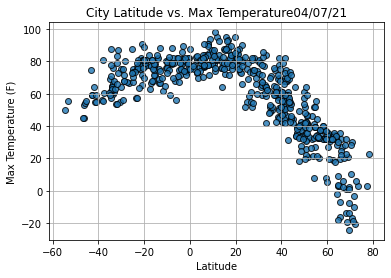

In [29]:
# create a scatter plot of latitude vs max temp
plt.scatter(lats,max_temps, 
            edgecolor='k',linewidth=1,marker="o",alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature" +time.strftime("%x"))
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

plt.show()

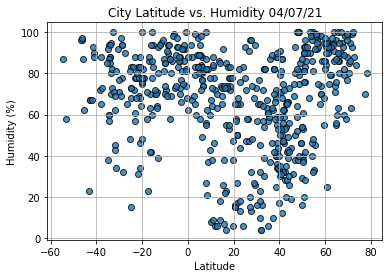

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

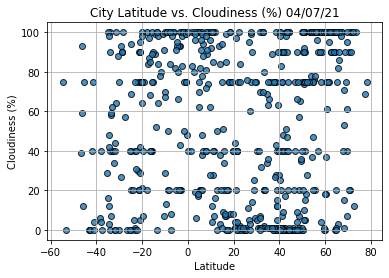

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

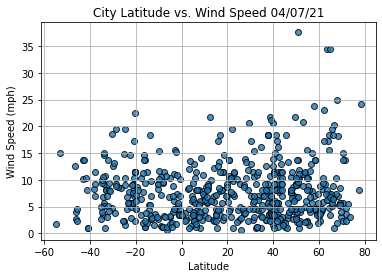

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [46]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [47]:
# Get Northern and Souther Hemispheres with .loc
index13 = city_data_df.loc[13]
index13

City                    Hithadhoo
Lat                          -0.6
Lng                       73.0833
Max Temp                    82.33
Humidity                       68
Cloudiness                     48
Wind Speed                  10.22
Country                        MV
Date          2021-04-07 20:12:42
Name: 13, dtype: object

In [48]:
city_data_df['Lat'] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
566     True
567    False
568     True
569     True
570    False
Name: Lat, Length: 571, dtype: bool

In [49]:
city_data_df.loc[(city_data_df['Lat'] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Crystal Beach,42.8699,-79.0583,72.00,54,98,10.36,CA,2021-04-07 20:16:11
1,Parainen,60.3067,22.3010,33.01,93,75,2.30,FI,2021-04-07 20:16:11
3,Les Cayes,18.2000,-73.7500,80.58,72,100,2.59,HT,2021-04-07 20:16:11
5,Jamestown,42.0970,-79.2353,75.00,46,1,5.75,US,2021-04-07 20:12:31
7,Atasu,48.6814,71.6433,40.06,79,1,7.16,KZ,2021-04-07 20:16:12


In [50]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

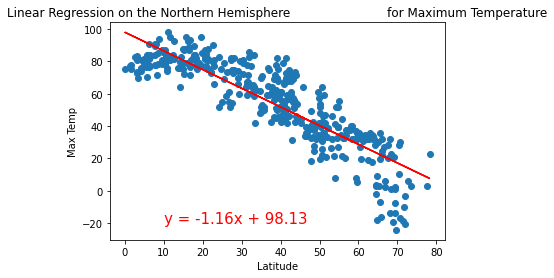

In [51]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

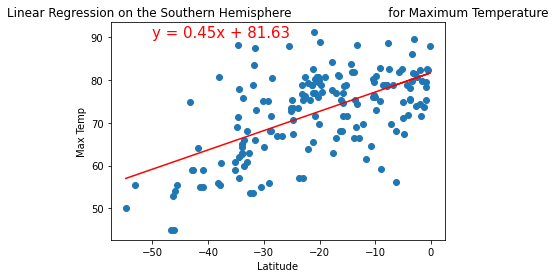

In [52]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

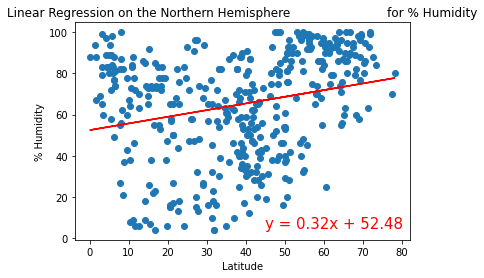

In [59]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(45,5))

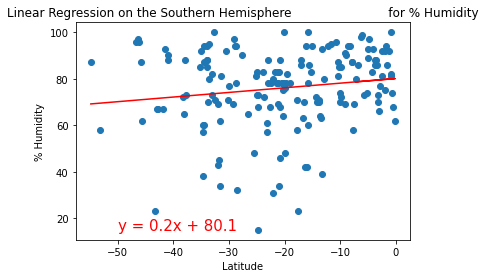

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

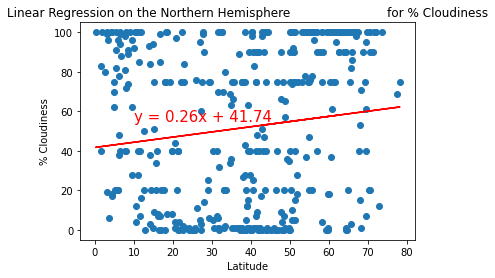

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df['Cloudiness']
# Call the funciton
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,55))

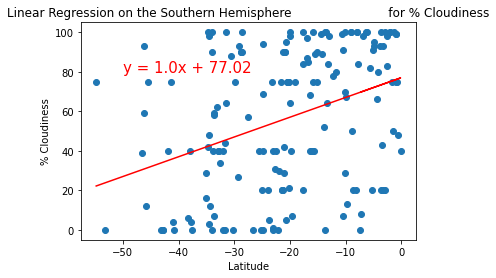

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,80))

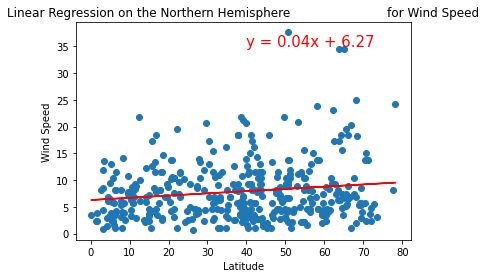

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

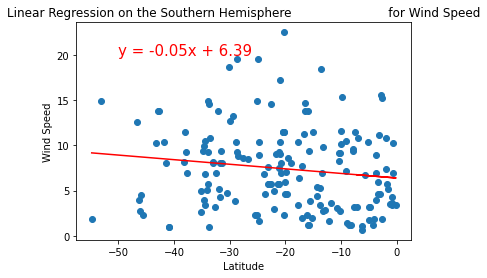

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))